In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
from wrapper import ModeShareEvaluator

# Prepare the evaluator
evaluator = ModeShareEvaluator(transition_size = 20)

In [17]:
from wrapper import ModeShareProblem

# Prepare the problem
problem = ModeShareProblem(
    3, [(-5, 5), (-5, 5), (-5, 5)], [0.0, 0.0, 0.0]
)

In [18]:
from boptx.algorithms import CMAES1P1Algorithm, OpdytsAlgorithm

# Prepare the algorithm
algorithm = CMAES1P1Algorithm(problem, candidates = 4)
algorithm = OpdytsAlgorithm(problem, algorithm)

In [19]:
from boptx.loop import Loop

# Prepare the calibration loop
loop = Loop(
    algorithm = algorithm,
    evaluator = evaluator,
    maximum_evaluations = 3000,
)

In [20]:
from boptx.tracker import Tracker

# Prepare tracking of the calibration
objectives = []
values = []
transitional = []

def my_tracker(state, evaluations):
    for evaluation in evaluations:
        values.append(evaluation.get_values())
        objectives.append(evaluation.get_objective())
        transitional.append(evaluation.is_transitional())
        
# Start the calibration
loop.advance(callback = my_tracker)

objectives = np.array(objectives)
values = np.array(values)
transitional = np.array(transitional)

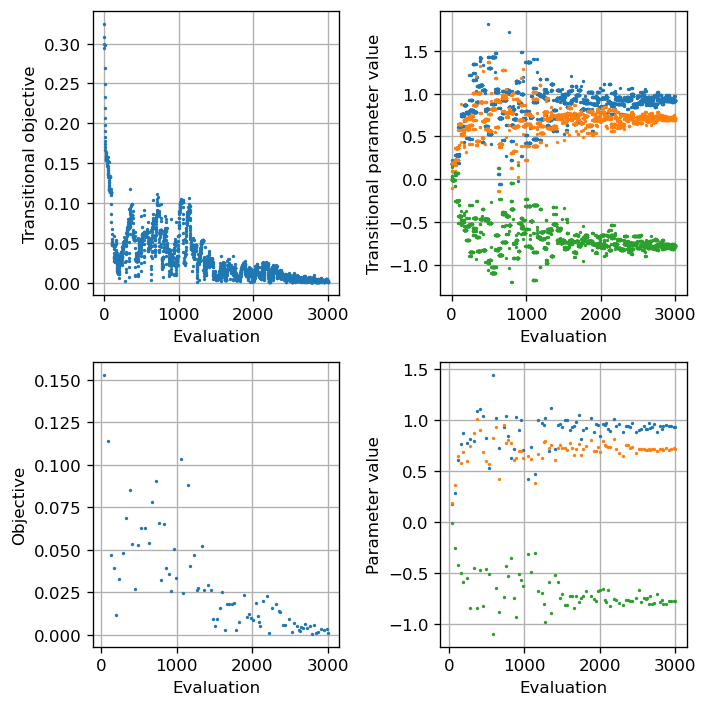

In [21]:
plt.figure(dpi = 120, figsize = (6, 6))

# Plot all evaluations
plt.subplot(2, 2, 1)
plt.plot(objectives, ".", markersize = 2)
plt.ylabel("Transitional objective")
plt.xlabel("Evaluation")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(values, ".", markersize = 2)
plt.ylabel("Transitional parameter value")
plt.xlabel("Evaluation")
plt.grid()

# Plot non-transitional evaluations

evaluations = np.arange(len(objectives))

plt.subplot(2, 2, 3)
plt.plot(evaluations[~transitional], objectives[~transitional], ".", markersize = 2)
plt.ylabel("Objective")
plt.xlabel("Evaluation")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(evaluations[~transitional], values[~transitional], ".", markersize = 2)
plt.ylabel("Parameter value")
plt.xlabel("Evaluation")
plt.grid()

plt.tight_layout()
plt.savefig("figures/calibration.png")